In [62]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as pt
import warnings
import jupyterthemes
from tqdm import tqdm
import os
import pickle
import json


from sklearn.preprocessing import StandardScaler,OrdinalEncoder,OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,chi2,f_classif

from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,classification_report

jupyterthemes.jtplot.style(theme="monokai",context="notebook",ticks=True,grid=False)
warnings.filterwarnings("ignore")

#setting some parameters
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams['font.style']=("italic")
plt.rcParams["font.size"]=(12)

In [63]:
jupyterthemes.get_themes()

['chesterish',
 'grade3',
 'gruvboxd',
 'gruvboxl',
 'monokai',
 'oceans16',
 'onedork',
 'solarizedd',
 'solarizedl']

In [64]:
#importing the data frame
data = pd.read_csv("adult.csv",index_col=False)

In [65]:
print(f"Here, We have data of {data.shape[0]} samples with {data.shape[1]} features.")

Here, We have data of 32561 samples with 15 features.


<p style='font-style:italic'> Checking for first five samples of Data </p>

In [66]:
data.head()

,age,workclass,final_weight,education,education_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,category
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<p style='font-style:italic'> Checking for last five samples of Data </p>

In [67]:
data.tail()

,age,workclass,final_weight,education,education_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,category
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


<p style='font-style:italic'> Checking data-types for each feature</p>

In [68]:
data.dtypes

age                 int64
workclass          object
final_weight        int64
education          object
education_years     int64
marital_status     object
occupation         object
relationship       object
race               object
sex                object
capital_gain        int64
capital_loss        int64
hours_per_week      int64
native_country     object
category           object
dtype: object

<p style='font-style:italic'> Checking for <b>NULL</b> values </p>

In [69]:
data.isnull().sum()

age                0
workclass          0
final_weight       0
education          0
education_years    0
marital_status     0
occupation         0
relationship       0
race               0
sex                0
capital_gain       0
capital_loss       0
hours_per_week     0
native_country     0
category           0
dtype: int64

### EDA

<p style='font-style:italic'> Copying data is considered a good practise in data EDA. To avoid loss of time and resources.</p>

In [70]:
df = data.copy()

In [71]:
# replace "?" in feature with "Unknown"
df['occupation']=df['occupation'].str.replace("?","Unkown")

In [72]:
df.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Unkown               1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

<p style="font-style:italic">In the below cell, numerical and object variables are seperated and converted to a list</p><p>Using inbuilt pandas functions for seperation.</p>

In [73]:
dim=df.select_dtypes(include="object").columns.to_list()
mes=df.select_dtypes(exclude="object").columns.to_list()

In [74]:
# Printing both of the lists
print(dim)
print(mes)

['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'category']
['age', 'final_weight', 'education_years', 'capital_gain', 'capital_loss', 'hours_per_week']


In [75]:
# describe function to get more insights about our numerical variable
df.describe()

,age,final_weight,education_years,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<p style="font-style:italic">Below we have ploted subplots with all of our Object/Dimensional variables. This tells us about the percentage of data present for each dimension in each variable. Like, in sex column we can see we have male samples as 66.92% and females with 33.08%. I prefer pie chart because it is less complecated and space efficient.</p>

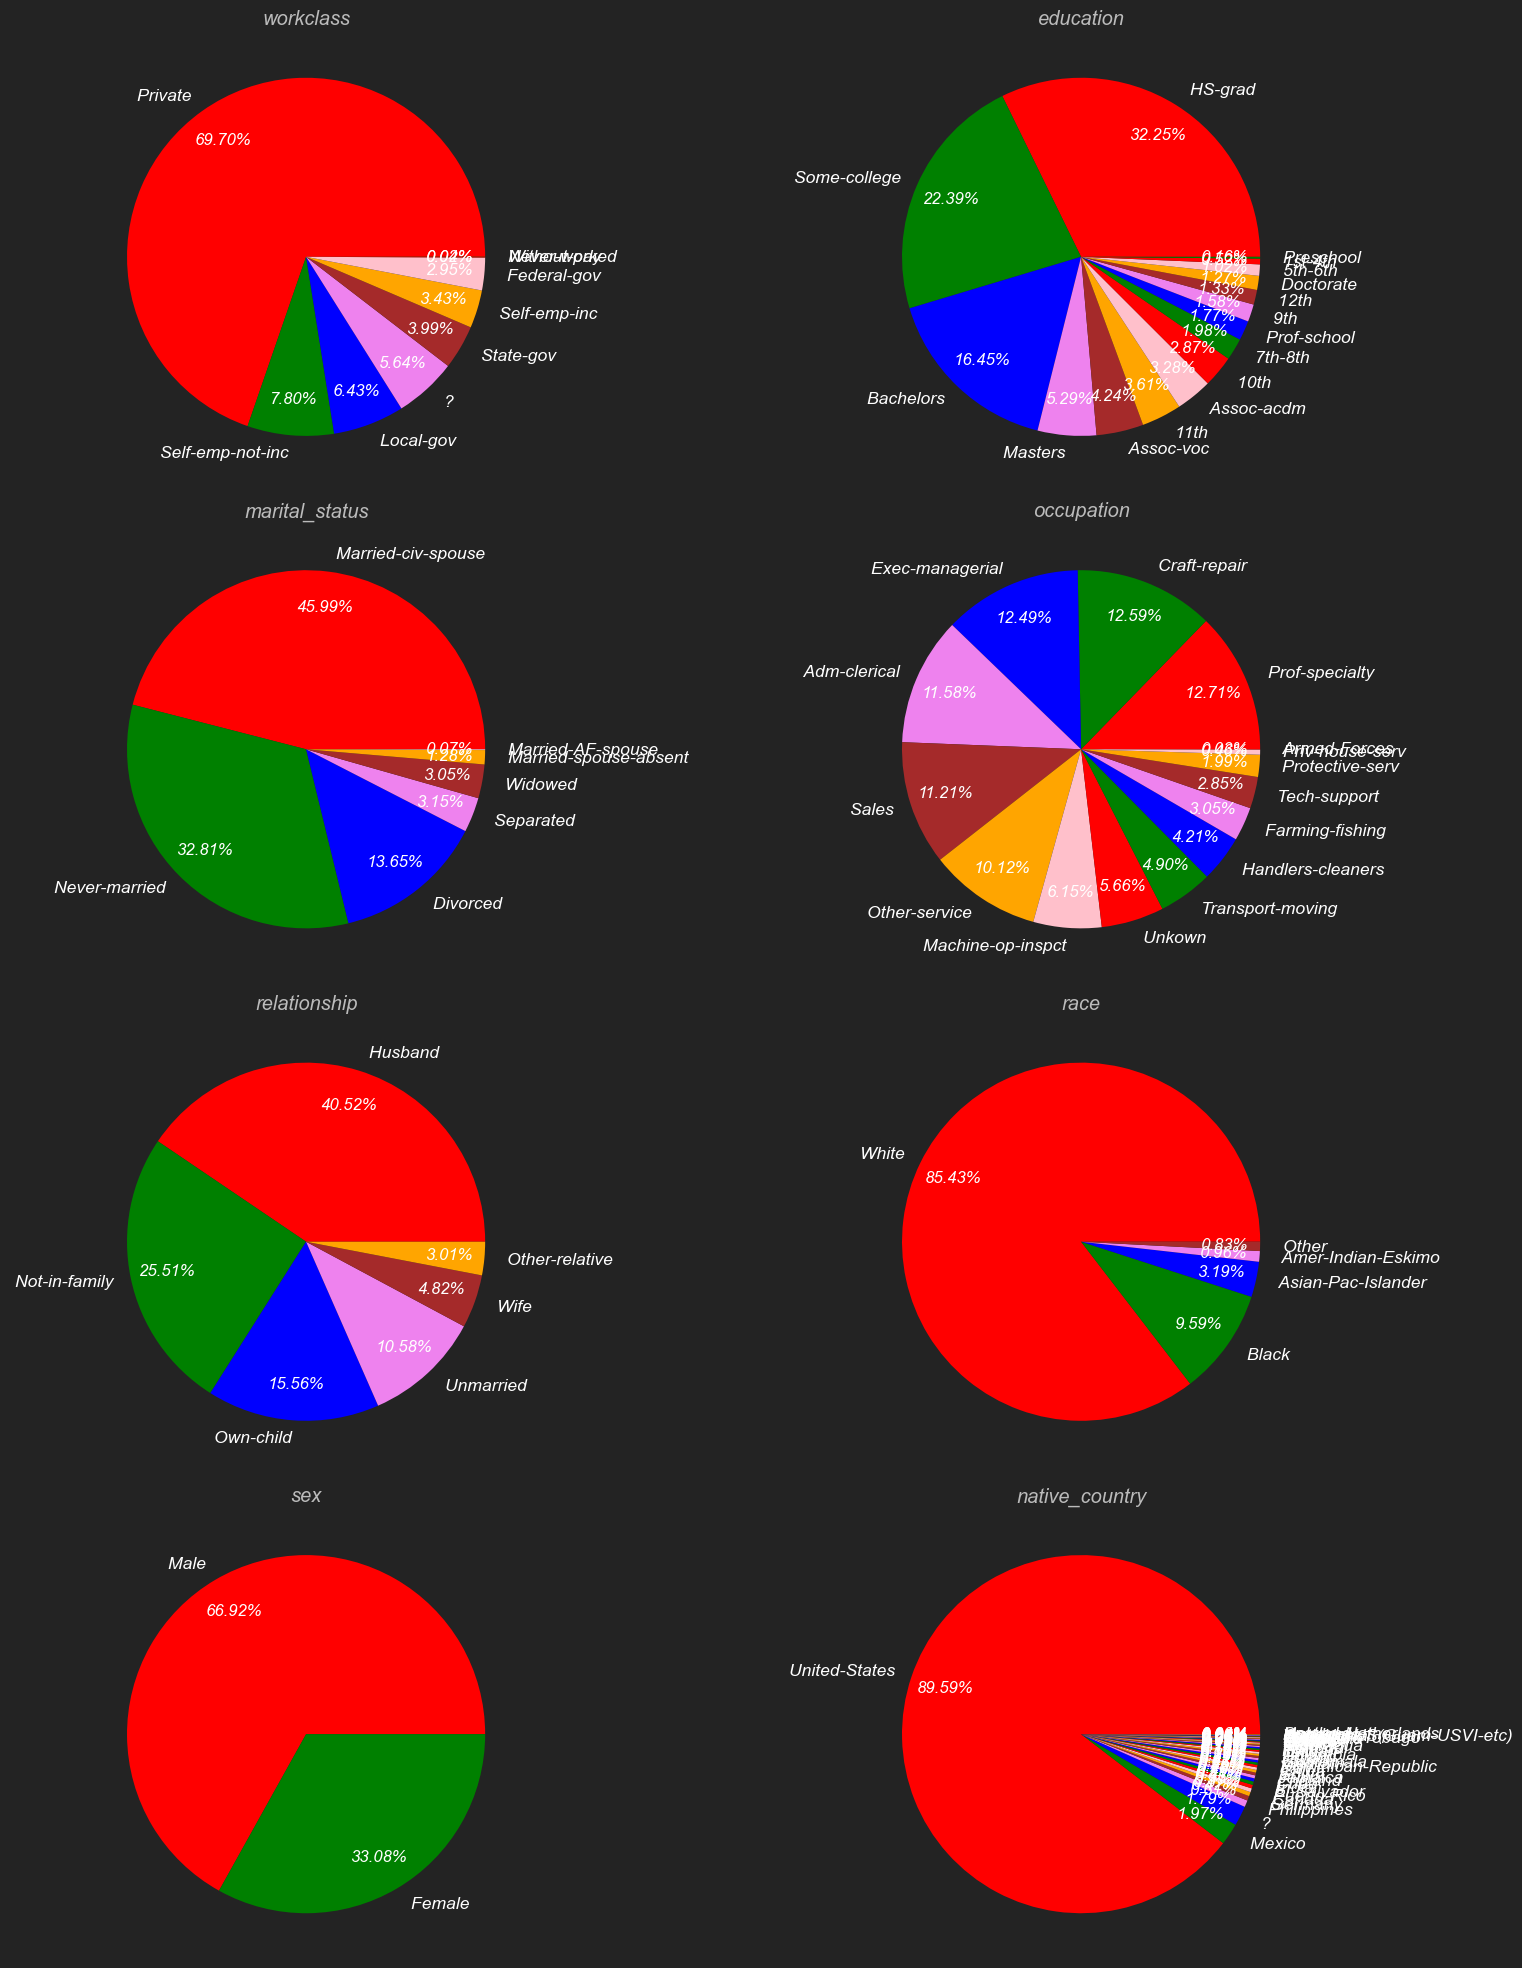

In [76]:
fig, ax =plt.subplots(nrows=4,ncols= 2,squeeze=True,figsize=(30,25))
plt.subplots_adjust(wspace=-0.5,hspace=0.1)
plt.style.use("dark_background")
c=0
for i in range(4):
    for j in range(2):
        ax[i,j].pie(df[dim[c]].value_counts(),autopct="%.2f%%",pctdistance=0.8,labels=df[dim[c]].value_counts().index,colors=["red","green","blue","violet","brown","orange","pink"])
        ax[i,j].set_title(dim[c])
        c+=1
    

<p style="font-style:italic">Histogram will give us information about distribution of our Numerical variables. As here can see that our Age, Final_weight, capital gain are mostly right skewed graphs.</p>

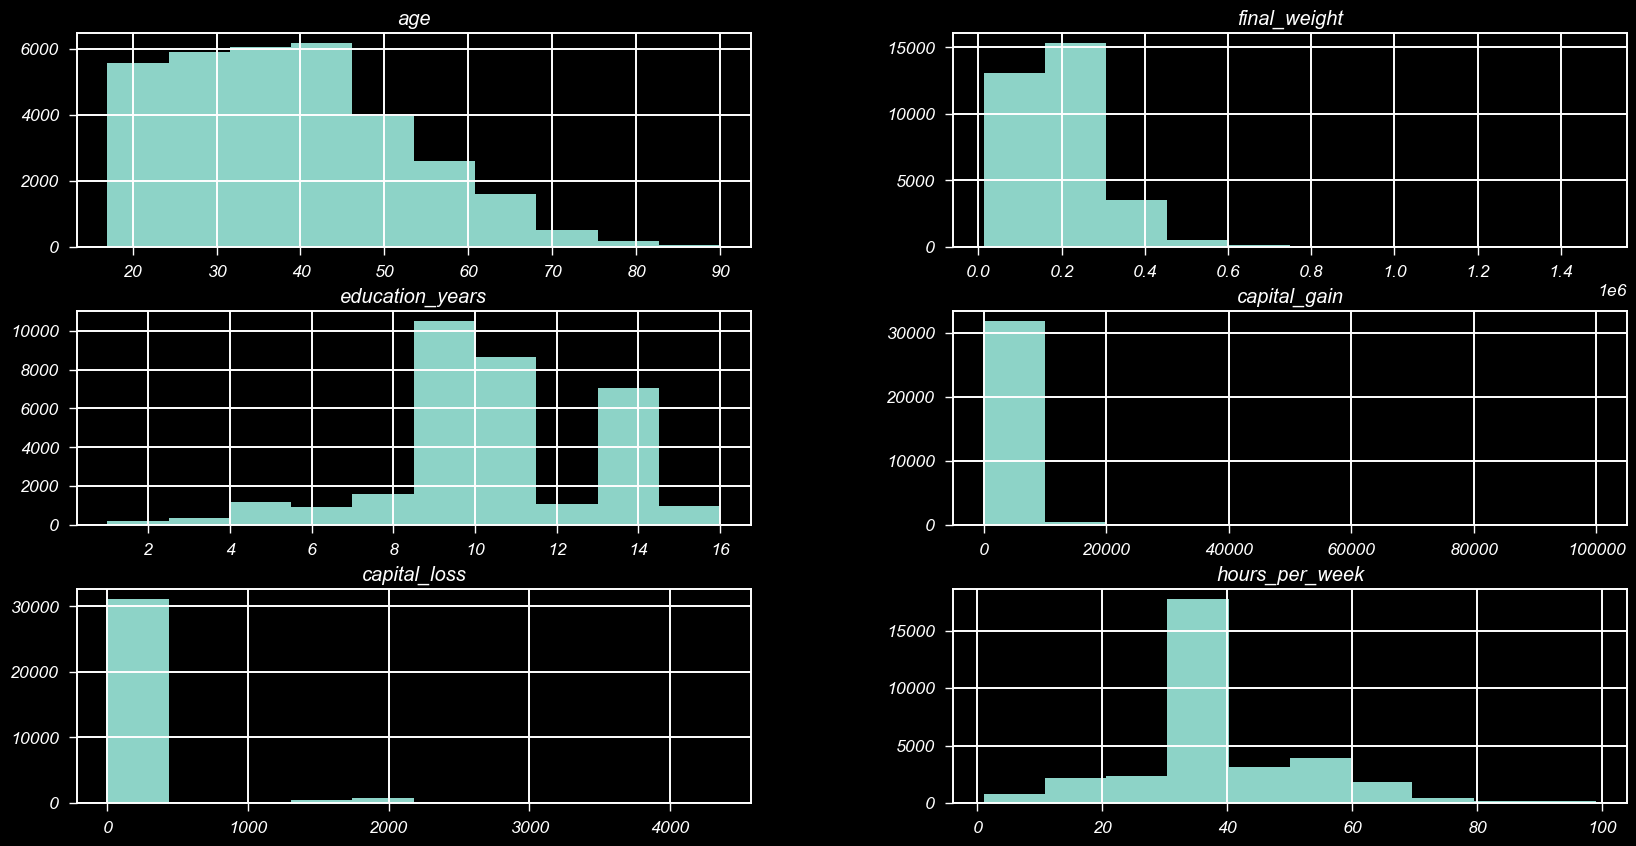

In [77]:
# plotting histogram with inbuit Hist function 
df[mes].hist()
plt.style.use("dark_background")
plt.show()

<Axes: title={'center': 'working Hours per week for each type education'}, xlabel='education', ylabel='Work Hours Per week'>

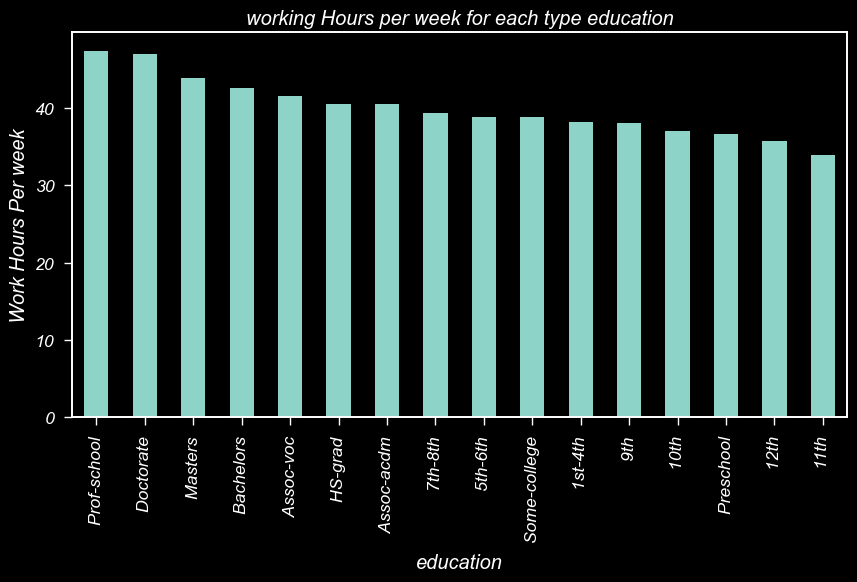

In [78]:
# Groupping data with education and taking mean by hrs per week
df.groupby("education")["hours_per_week"].mean().sort_values(ascending=False).plot(kind="bar",ylabel="Work Hours Per week",title="working Hours per week for each type education",figsize=(10,5),style=plt.style.use("dark_background"))

<p style="font-style:italic">The above graph tells us about the relation of education and working hours per week. Here, as seen candidate with prof-school is working most in hrs per week followed by doctorate and so on at last 11th pass is working least</p>

<Axes: title={'center': 'working Hours per week for each type education'}, xlabel='education,sex', ylabel='Work Hours Per week'>

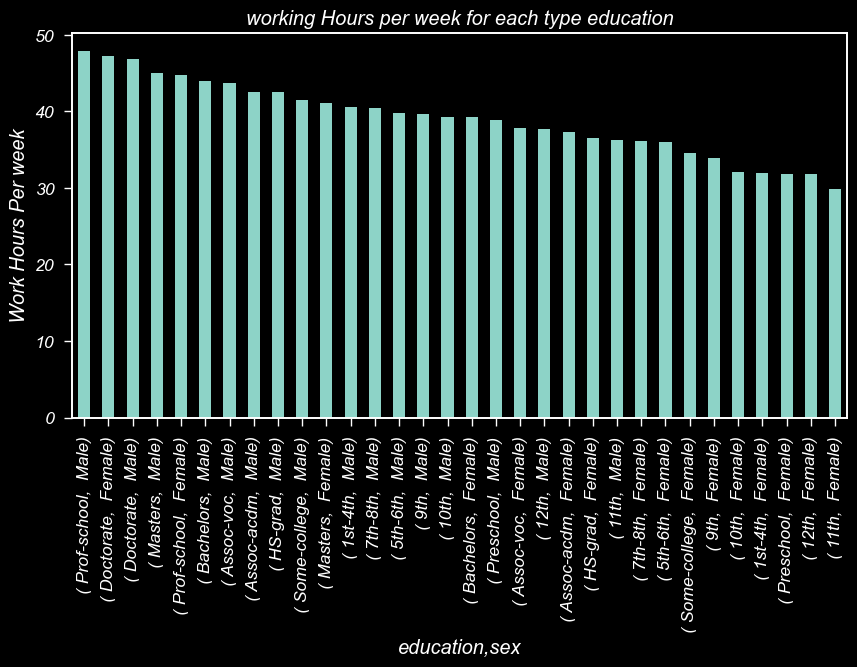

In [79]:
# Same as above
df.groupby(["education","sex"])["hours_per_week"].mean().sort_values(ascending=False).plot(kind="bar",ylabel="Work Hours Per week",title="working Hours per week for each type education",figsize=(10,5),style=plt.style.use("dark_background"))

<p style="font-style:italic">In the above bar chart we can see that prof school male is working more and in doctorate female is working more but as the amount of education decreases men has to work more as compared to women. This suggests that female with higher education are more successful than men and vice-versa.</p>

<Axes: title={'center': 'working Hours per week for each type education'}, xlabel='sex', ylabel='Work Hours Per week'>

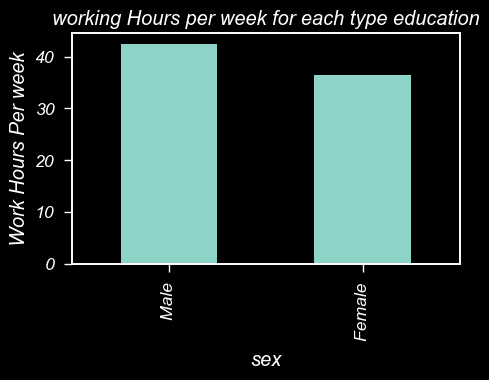

In [80]:
df.groupby("sex")["hours_per_week"].mean().sort_values(ascending=False).plot(kind="bar",ylabel="Work Hours Per week",title="working Hours per week for each type education",figsize=(5,3),style=plt.style.use("dark_background"))

<p style='font-style:italic'> As above, Overall males are working more than females.</p>

<p style="font-style:italic">Below are the to working candidates working most by marital sttus, sex, race. table below chart shows the same.</p>

<Axes: xlabel='marital_status,sex,race'>

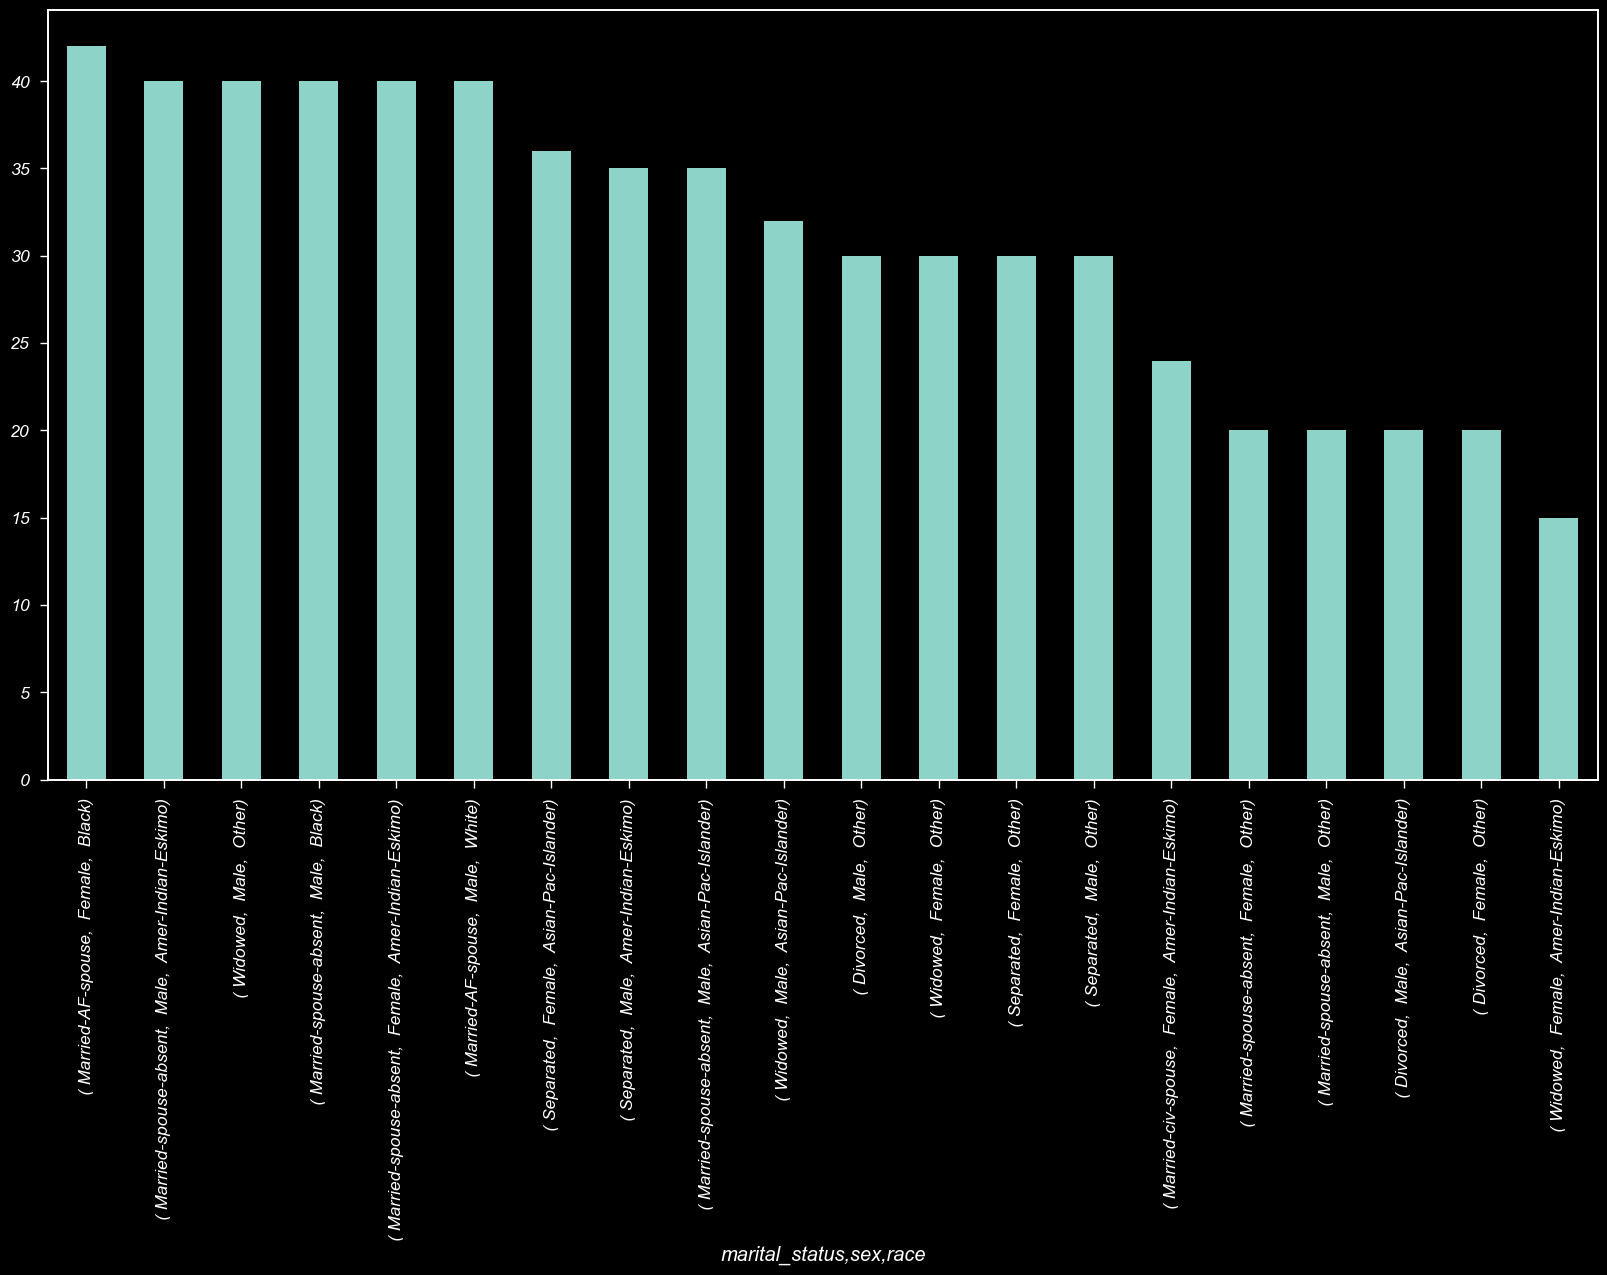

In [81]:
df.groupby(["marital_status","sex",'race'])["hours_per_week"].min().sort_values(ascending=False).nlargest(20).plot(kind='bar',rot=90,style=plt.style.use("dark_background"))

In [82]:
df.groupby(["marital_status","sex",'race'])["hours_per_week"].min().sort_values(ascending=False).nlargest(20)

marital_status          sex      race               
 Married-AF-spouse       Female   Black                 42
 Married-spouse-absent   Male     Amer-Indian-Eskimo    40
 Widowed                 Male     Other                 40
 Married-spouse-absent   Male     Black                 40
                         Female   Amer-Indian-Eskimo    40
 Married-AF-spouse       Male     White                 40
 Separated               Female   Asian-Pac-Islander    36
                         Male     Amer-Indian-Eskimo    35
 Married-spouse-absent   Male     Asian-Pac-Islander    35
 Widowed                 Male     Asian-Pac-Islander    32
 Divorced                Male     Other                 30
 Widowed                 Female   Other                 30
 Separated               Female   Other                 30
                         Male     Other                 30
 Married-civ-spouse      Female   Amer-Indian-Eskimo    24
 Married-spouse-absent   Female   Other                 20
   

<p>Here, among 20 samples we can see  Married-AF-spouse-Black-female works abour 42hrs per week and compared to widowed-American-indian-Eskimo-female works 15hrs. There are various factors affecting this things but because of availability of data we are unable to analyze that.</p>

<Axes: xlabel='occupation'>

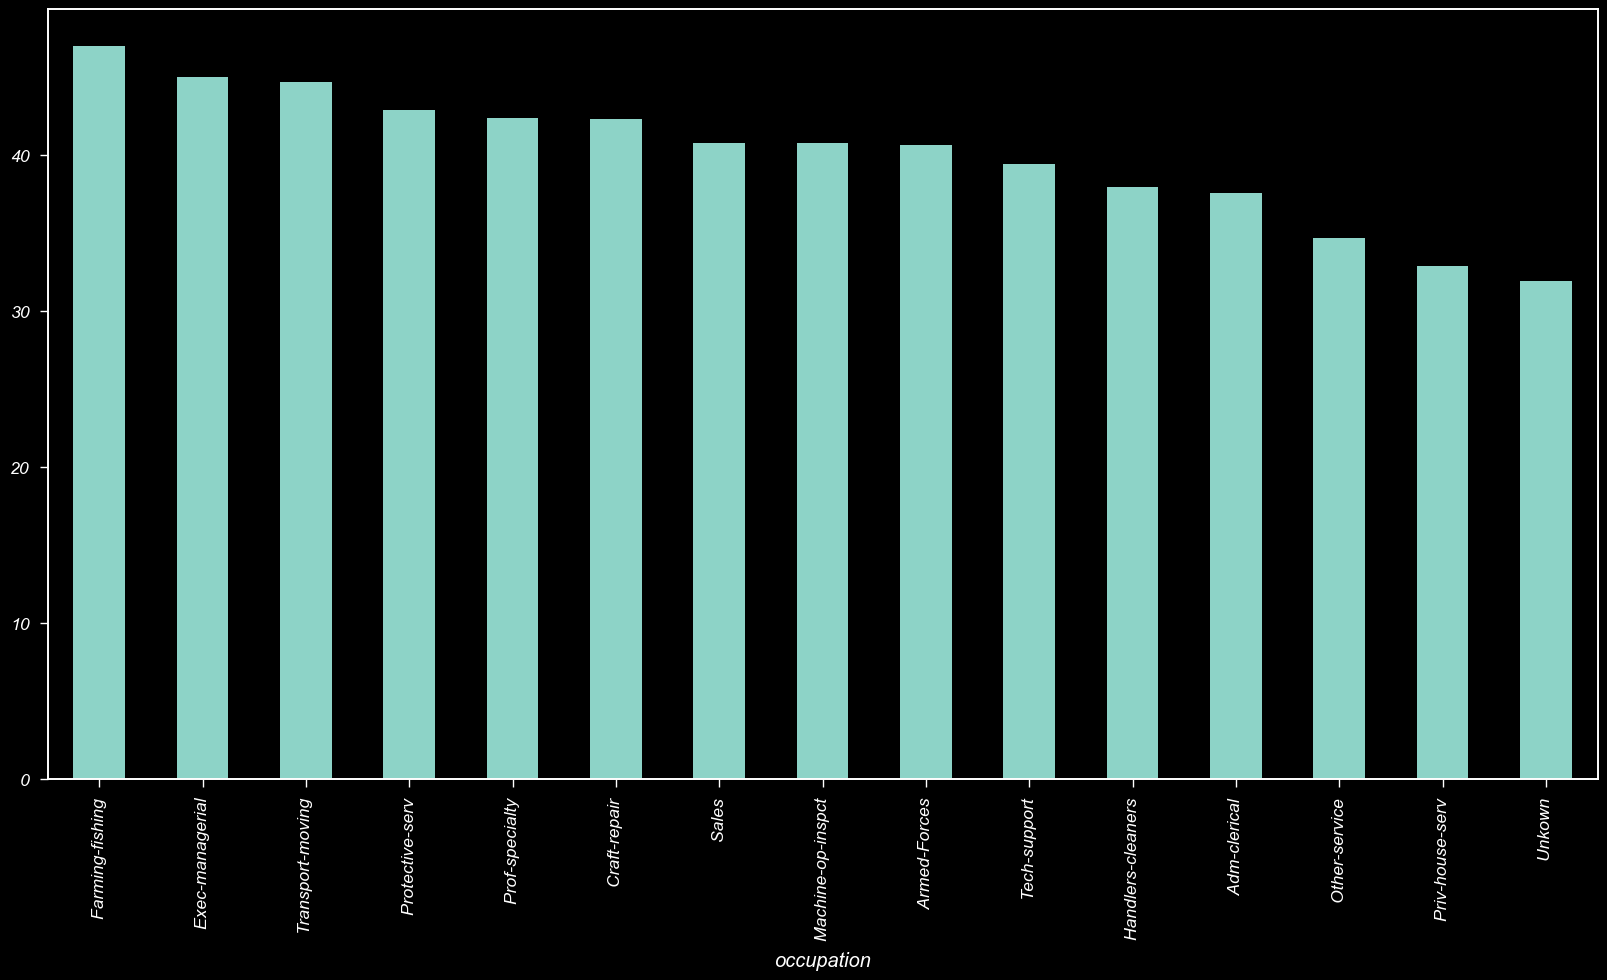

In [83]:
df.groupby(["occupation"])['hours_per_week'].mean().sort_values(ascending=False).plot(kind="bar")

This graph shows which occupation has to work more like farming and fishing has to work more than exec-manager while private house servent works least.

<Axes: xlabel='workclass,education,marital_status,occupation,relationship,race,sex,native_country,category'>

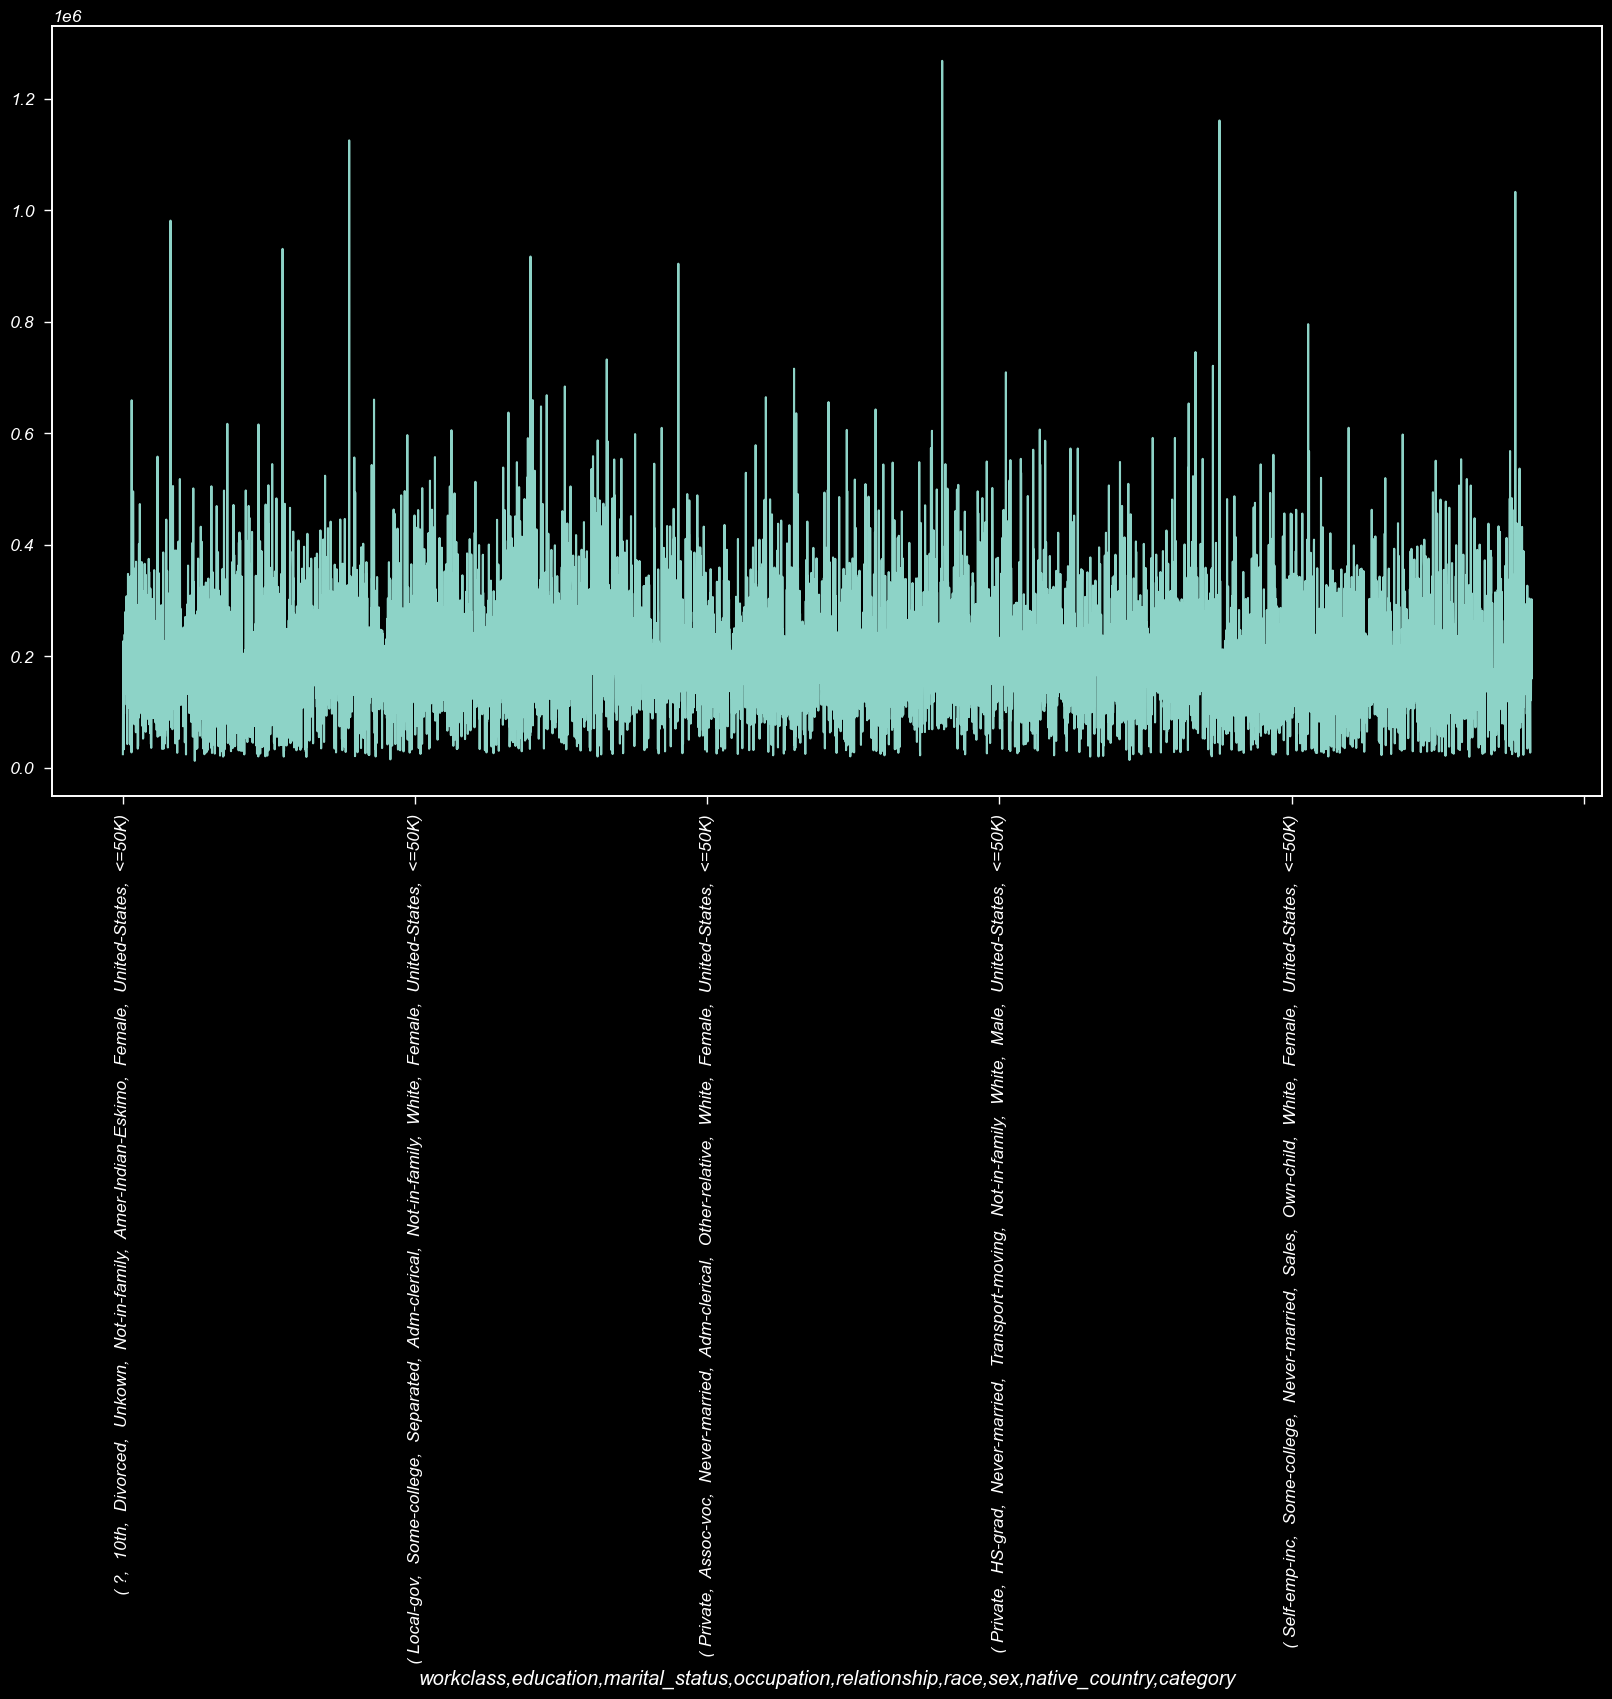

In [84]:
df.groupby(dim)["final_weight"].mean().plot(rot=90)

In [85]:
plt.figure(figsize=(20,15))
pt.scatter_3d(data_frame=df,x="hours_per_week",y="age",z="education_years",color="education",template="plotly_dark",labels={"hours_per_week":"Working hours per week","education_years":"Education in Years"})


<Figure size 2000x1500 with 0 Axes>

<Axes: >

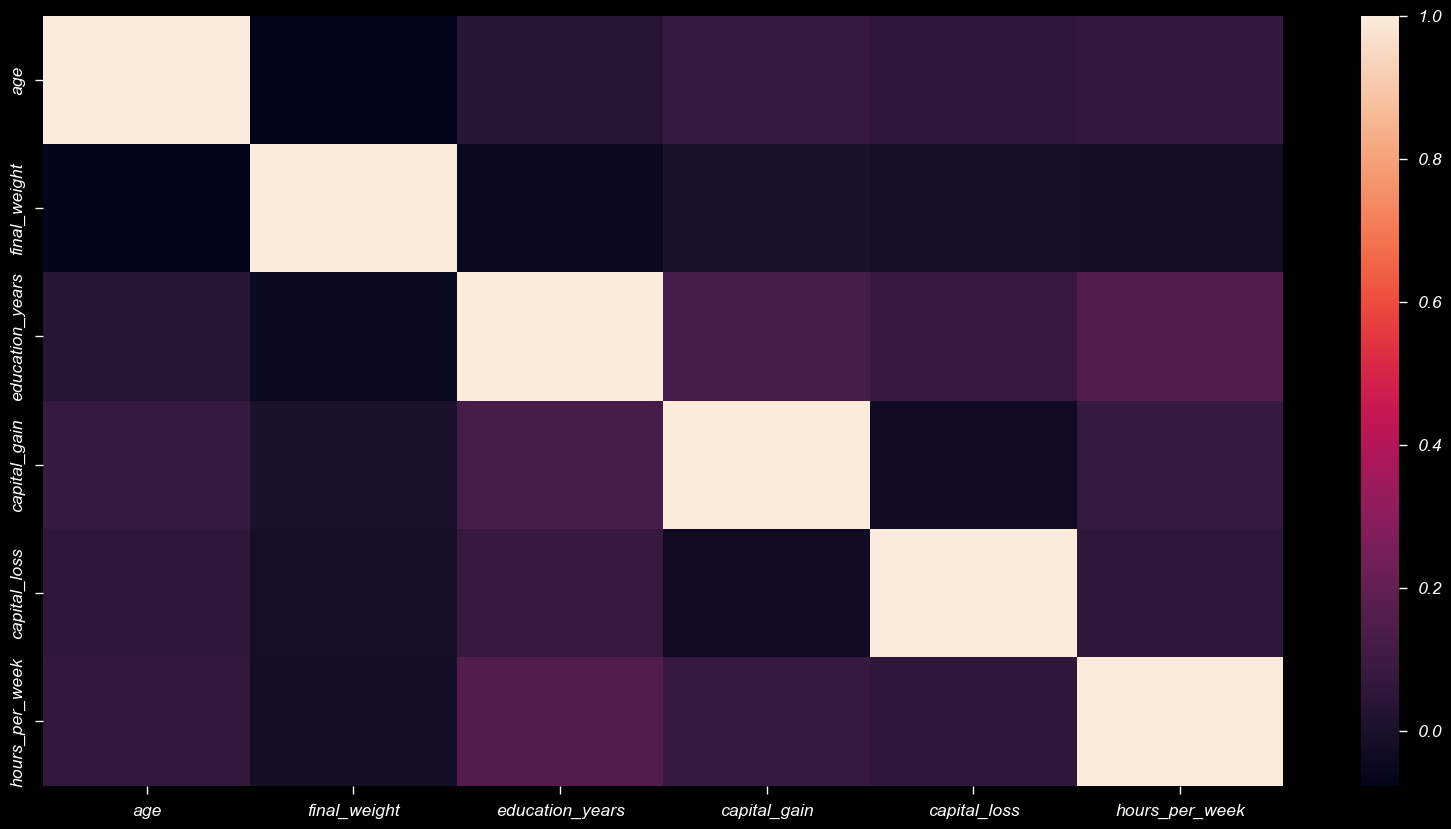

In [86]:
import seaborn as sns
sns.heatmap(df.corr())

In [87]:
df.replace(" ?",np.nan,inplace=True)

In [88]:
(df.isnull().sum()/df.shape[0])*100

age                0.000000
workclass          5.638647
final_weight       0.000000
education          0.000000
education_years    0.000000
marital_status     0.000000
occupation         0.000000
relationship       0.000000
race               0.000000
sex                0.000000
capital_gain       0.000000
capital_loss       0.000000
hours_per_week     0.000000
native_country     1.790486
category           0.000000
dtype: float64

In [89]:
df.dropna(inplace=True)

In [90]:
df.isnull().sum()

age                0
workclass          0
final_weight       0
education          0
education_years    0
marital_status     0
occupation         0
relationship       0
race               0
sex                0
capital_gain       0
capital_loss       0
hours_per_week     0
native_country     0
category           0
dtype: int64

<Axes: ylabel='category'>

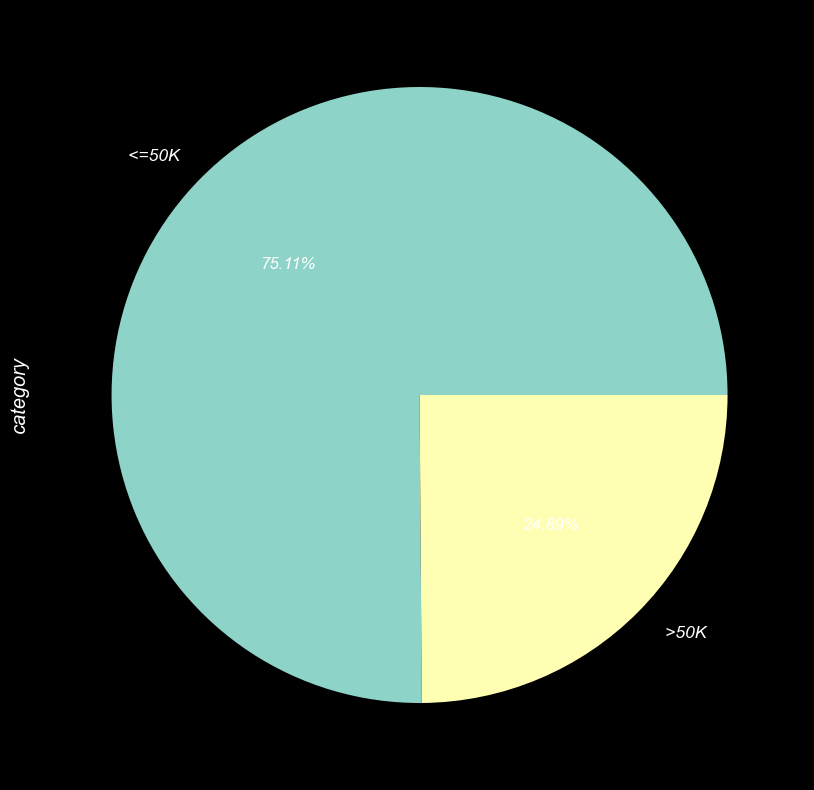

In [91]:
df.category.value_counts().plot(kind="pie",autopct="%.2f%%")

In [92]:
X=df.drop("category",axis=1)
y=df['category']

In [93]:
X.shape

(30169, 14)

In [94]:
y.shape

(30169,)

### Feature Enginnering and Model Building

In [95]:
X.drop("final_weight",axis=1,inplace=True)

In [96]:
dim_x=X.select_dtypes(include="object").columns.to_list()
dim_x

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [111]:
# for our webapp
dictionary={}

for i in dim_x:
    dictionary[i]=list(df[i].unique())

with open("file.json","w") as f:
    json.dump(dictionary,f)

In [36]:
for i in dim_x:
    print(f"{i}---{df[i].nunique()}")

workclass---8
education---16
marital_status---7
occupation---15
relationship---6
race---5
sex---2
native_country---41


In [37]:
col=X.columns
col

Index(['age', 'workclass', 'education', 'education_years', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')

In [38]:
ex=X.copy()

In [39]:
orea=OrdinalEncoder()
ohe=OneHotEncoder()

In [40]:
# seperating features based on no of categories
ls_8=[]
gt_8=[]
for i in dim_x:
    if df[i].nunique()<=8:
        ls_8.append(i)
    else:
        gt_8.append(i)

In [41]:
le=LabelEncoder()
y=le.fit_transform(y)

In [42]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=40,test_size=.30,stratify=y)

In [43]:
# creating first column Transformer
trans1=ColumnTransformer([("ordinalEnc",OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1),ls_8),
                          ("OneHot",OneHotEncoder(sparse=False, handle_unknown='ignore'),gt_8)],remainder="passthrough")



In [44]:
x_traine=trans1.fit_transform(x_train)

print(x_traine.shape)

fe_sel_chi=SelectKBest(score_func=chi2,k=60)
fe_sel_classif=SelectKBest(score_func=f_classif,k=60)

(21118, 81)


In [45]:
rf=RandomForestClassifier()
scores={}
ls=[fe_sel_chi,fe_sel_classif]
for i in tqdm(ls):
    x_var=i.fit_transform(x_traine,y_train)
    rf.fit(x_var,y_train)
    scores[i]=accuracy_score(y_train,rf.predict(x_var))


100%|██████████| 2/2 [00:05<00:00,  2.64s/it]


In [46]:
#checking for best score
scores

{SelectKBest(k=60, score_func=<function chi2 at 0x0000018C58BA3EE0>): 0.9697414527890899,
 SelectKBest(k=60): 0.969788805758121}

In [47]:
# creating seecond column Transformer
trans2=ColumnTransformer([("kbest",SelectKBest(score_func=chi2,k=60),np.arange(0,81))],remainder="passthrough")

In [48]:
xss=trans2.fit_transform(x_traine,y_train)
xss.shape

(21118, 60)

Chi2 turned out to be better feature selector

In [49]:
model=[LogisticRegression(),
        ExtraTreesClassifier(),
        AdaBoostClassifier(n_estimators=3000,learning_rate=0.05,algorithm="SAMME.R"),
        SVC(),
        KNeighborsClassifier(),
        RidgeClassifier(),
        GaussianNB(),
        MLPClassifier()]

In [50]:
# Importing custom lib
from ML_func import cv_score_4ls
# Getting Cross val score for all the model to select best model
score_n=cv_score_4ls(model,X=x_traine,y=y_train,strat="mean")

100%|██████████| 8/8 [02:47<00:00, 20.93s/it]


In [51]:
score_n

{LogisticRegression(): 0.8079366398115658,
 ExtraTreesClassifier(): 0.8259782401028998,
 AdaBoostClassifier(learning_rate=0.05, n_estimators=3000): 0.8620135203861968,
 SVC(): 0.7942987401244268,
 KNeighborsClassifier(): 0.8374848637332357,
 RidgeClassifier(): 0.8149445631426746,
 GaussianNB(): 0.8170756037464392,
 MLPClassifier(): 0.8385262613107155}

In [52]:
parameters={"n_estimators":np.arange(1000,5000,1000),
            "algorithm":["SAMME.R"],
            "learning_rate":np.arange(0.5,5.0,1)}

In [53]:
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(AdaBoostClassifier(),param_grid=parameters,scoring="accuracy",n_jobs=5,return_train_score=True,cv=3)
model.fit(xss[:2000],y_train[:2000])

GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=5,
             param_grid={'algorithm': ['SAMME.R'],
                         'learning_rate': array([0.5, 1.5, 2.5, 3.5, 4.5]),
                         'n_estimators': array([1000, 2000, 3000, 4000])},
             return_train_score=True, scoring='accuracy')

In [54]:
model.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 0.5, 'n_estimators': 1000}

In [55]:
model.best_score_

0.8480009244626935

In [56]:
model=Pipeline([("Transformation1",trans1),
                ("Transformation2",trans2),
                ("Normalize",StandardScaler()),
                ("rf",AdaBoostClassifier(algorithm='SAMME.R', learning_rate= 0.5, n_estimators= 1000))])

In [57]:
model.fit(x_train,y_train)

Pipeline(steps=[('Transformation1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalEnc',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['workclass',
                                                   'marital_status',
                                                   'relationship', 'race',
                                                   'sex']),
                                                 ('OneHot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['education', 'occupation',
                                                   'native_country'])])),
                ('Trans...
                                                              score_func=<function chi2 at 0x0000018C58BA3EE0>),
                                                  array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]))])),
                ('Normalize', StandardScaler()),
                ('rf',
                 AdaBoostClassifier(learning_rate=0.5, n_estimators=1000))])

In [58]:
y_pred=model.predict(x_test)

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      6799
           1       0.77      0.64      0.70      2252

    accuracy                           0.86      9051
   macro avg       0.83      0.79      0.81      9051
weighted avg       0.86      0.86      0.86      9051



In [60]:
# 58, Self-emp-inc, 210563, HS-grad, 9, Married-civ-spouse, Sales, Wife, White, Female, 15024, 0, 35, United-States, >50K


In [61]:
arr=[58, 'Self-emp-inc', 'HS-grad', 9, 'Married-civ-spouse', 'Sales', 'Wife', 'White', 'Female', 15024, 0, 35, 'United-States']
def prediction(model,arr=list):
    arr=np.array(arr).reshape(1,-1)
    df=pd.DataFrame(data=arr,columns=col)
    prediction=model.predict(df)
    if prediction[0] == 1:
        return [">50K"]
    elif prediction[0] ==0:
        return ["<50K"]
    else:
        return ["Error"]

In [62]:
# making dir for model and saving model into it
try:
    os.mkdir("models")
except:
    with open("models/model.pkl","wb") as f:
        f.write(pickle.dumps(model))


In [63]:
# code for loading model
with open("models/model.pkl","rb") as f:
    model_rel=pickle.loads(f.read())

In [64]:
# prediction after loading the model
prediction(model=model_rel,arr=arr)

['>50K']